# Multi-Layer Perceptrons
## Extend the previous example to multiple layers, and use Keras to do it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

Let's ruin the separability of the data and see what happens

In [2]:
def generateData(n, theta = None, overlap = 0.0, verbose = 1):
    """Generate a 2D set of points and an associated decision variable,
       of length n.  The points are linearly separable by the decision variable Y.
       The line of separation is chosen to be at a random angle.  Half the points
       are on one side and half on the other.
       
       theta = angle of line separating points, in radians
       overlap = 0.1  Would be a 10% overlap along the line of separation
                      The points are still random so your results will vary
    """
    
    if not theta:
        theta = random()*np.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]])
    
    n1 = np.floor(n/2)
    
    data = np.zeros((n,3))
    y = np.zeros(n)
    
    dx = 0.01 - overlap
    for i in range(n):
        if i < n1:
            pt = np.array([random()+dx,random()*2 - 1])
            y[i] = 1
        else:
            pt = np.array([-1*random()-dx,random()*2 - 1])
            y[i] = 0
        data[i,1:] = np.matmul(R,pt)
    
    data[:,0] = 1
    if verbose == 1:
        print("theta = ",np.degrees(theta))
        print("slope = ",np.tan(theta - np.pi/2))
    
    return (y,data)

theta =  -45.0
slope =  1.0


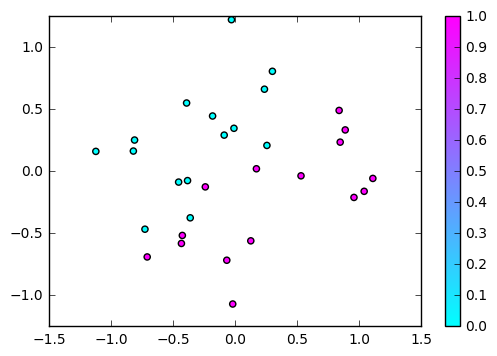

In [3]:
N = 30
Y,X = generateData(N,theta = -np.pi/4, overlap = 0.1, verbose = 1)

plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
#plt.xlim([-1.1,1.1])
#plt.ylim([-1.1,1.1])
plt.axis('equal')
plt.colorbar()
plt.show()

## Single Perceptron Learning Algorithm
### Step Function, Perceptron Criterion Loss Function

In [4]:
def plotPointsAndLine(fignum,X,Y,W):
    plt.figure(fignum)
    xplt = np.linspace(-1.1,1.1,num=50)
    yplt = -W[1]/W[2]*xplt - W[0]/W[2]
    plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
    plt.plot(xplt,yplt,'r-')
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    #plt.axis('equal')
    
stepfn = np.vectorize(lambda x: 0 if x < 0 else 1)

Starting W:  [ 0.65221472 -1.73192759 -0.90051003]
Iterations:  1000
Ending W [ 0.01221472  0.03781447 -0.05728459]
Ending J 18.0


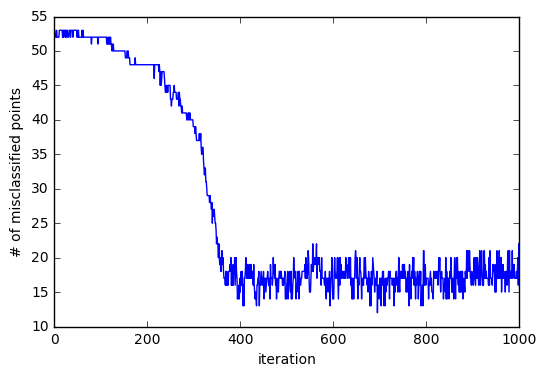

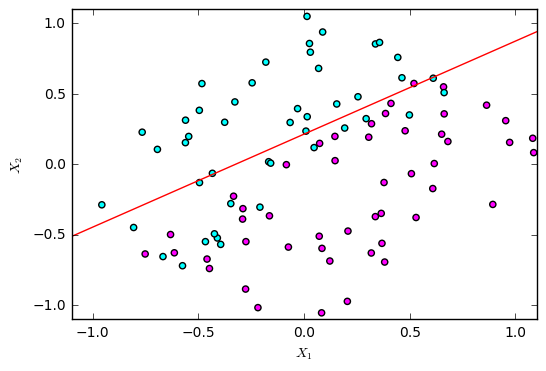

In [5]:
N = 100
Y,X = generateData(N,theta = -np.pi/4, overlap = 0.15, verbose = 0)

W = np.random.random(size=X.shape[1])*4 - 2
print('Starting W: ',W)

plotPointsAndLine(1,X,Y,W)

err = []
dW = 0.01
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
err.append(J)
count = 0
countMax = 1000
while J > 0 and count < countMax:
    count = count + 1
    O = stepfn(np.matmul(X,W))
    J = np.sum(np.abs(Y-O))
    err.append(J)
    gradJ = (Y-O).reshape((N,1))*X
    misclassified = gradJ[np.where(gradJ[:,0] != 0)]
    NM = misclassified.shape[0]   # how many are misclassified
    if NM == 0:
        break
    x = misclassified[np.random.randint(0,NM)]
    W = W + dW*x

print('Iterations: ',count)
print('Ending W',W)
print('Ending J',J)
plt.figure(2)
plt.plot(err)
plt.xlabel('iteration')
plt.ylabel('# of misclassified points')

plotPointsAndLine(3,X,Y,W)
plt.show()

## Let's try a different distribution of input data

In [6]:
def generateData2(n, theta = None, verbose = 1):
    """Generate a 2D set of points and an associated decision variable,
       of length n.  The points for this one are in spirals.
       
       theta = angle of line separating points, in radians
       overlap = 0.1  Would be a 10% overlap along the line of separation
                      The points are still random so your results will vary
    """
    from numpy.random import random
    
    if not theta:
        theta = random()*np.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]])
    
    n1 = int(np.floor(n/2))
    
    data = np.zeros((n,3))
    y = np.zeros(n)
    
    # polar coordinates
    r = np.append(np.linspace(0.0,1.0,n1), np.linspace(0.0,1.0,n-n1))
    t = np.append(np.linspace(0.0,np.pi,n1), np.linspace(0,np.pi,n-n1) - np.pi/2)
    xs = r*np.cos(t) + (np.random.rand(n) - 0.5)*0.2
    ys = r*np.sin(t) + (np.random.rand(n) - 0.5)*0.2
    
    data[:,0] = 1.0
    data[:,1] = xs
    data[:,2] = ys
    
    y[0:n1] = 1
    y[n1:n] = 0

    #for i in range(n):
    #    data[i,1:] = np.matmul(R,data[i,1:])
    
    if verbose == 1:
        print("theta = ",np.degrees(theta))
        print("slope = ",np.tan(theta - np.pi/2))
    
    return (y,data)

In [7]:
N = 30
Y,X = generateData2(N,theta = -np.pi/4, verbose = 1)

plt.figure(1, figsize=(8, 6))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
#plt.xlim([-1.1,1.1])
#plt.ylim([-1.1,1.1])
#plt.axis('equal')
plt.colorbar()
plt.show()

theta =  -45.0
slope =  1.0


Starting W:  [-1.84454733  0.74910976 -1.59846195]
Iterations:  500
Ending W [ 0.07545267 -0.26422594 -0.2251938 ]
Ending J 41.0


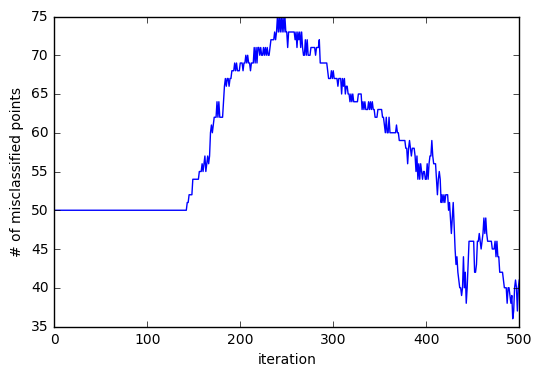

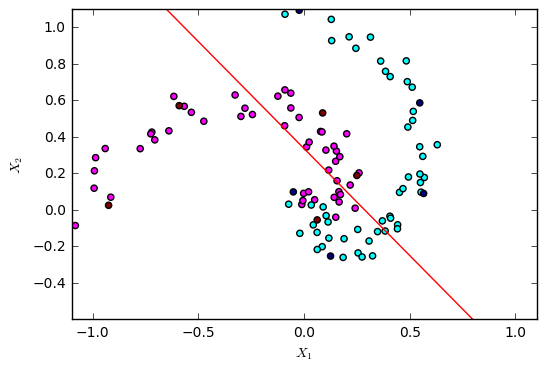

In [8]:
N = 100
Y,X = generateData2(N,theta = -np.pi/4, verbose = 0)
Ytest,Xtest = generateData2(int(N/10),theta = -np.pi/4, verbose = 0)

W = np.random.random(size=X.shape[1])*4 - 2
print('Starting W: ',W)

#plotPointsAndLine(1,X,Y,W)

err = []
dW = 0.01
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
err.append(J)
count = 0
countMax = 500
while J > 0 and count < countMax:
    count = count + 1
    O = stepfn(np.matmul(X,W))
    J = np.sum(np.abs(Y-O))
    err.append(J)
    gradJ = (Y-O).reshape((N,1))*X
    misclassified = gradJ[np.where(gradJ[:,0] != 0)]
    NM = misclassified.shape[0]   # how many are misclassified
    if NM == 0:
        break
    x = misclassified[np.random.randint(0,NM)]
    W = W + dW*x

print('Iterations: ',count)
print('Ending W',W)
print('Ending J',J)
plt.figure(2)
plt.plot(err)
plt.xlabel('iteration')
plt.ylabel('# of misclassified points')

plt.figure(3)
xplt = np.linspace(-1.1,1.1,num=50)
yplt = -W[1]/W[2]*xplt - W[0]/W[2]
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.plot(xplt,yplt,'r-')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.show()

How did our model do?

In [9]:
O = stepfn(np.matmul(Xtest,W))
J = np.sum(np.abs(Ytest-O))
print('Error: {:.2%}'.format(J/len(Ytest)))

Error: 40.00%


# Keras NN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
model = Sequential()
model.add(Dense(output_dim=1,init='uniform',activation='hard_sigmoid',bias=True,input_dim=2))
model.compile(optimizer='sgd',loss='mse',metrics=['binary_accuracy'])
X_train, y_train = X[:,1:], Y
X_test, y_test = Xtest[:,1:], Ytest
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=1, verbose=0)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 40.00%


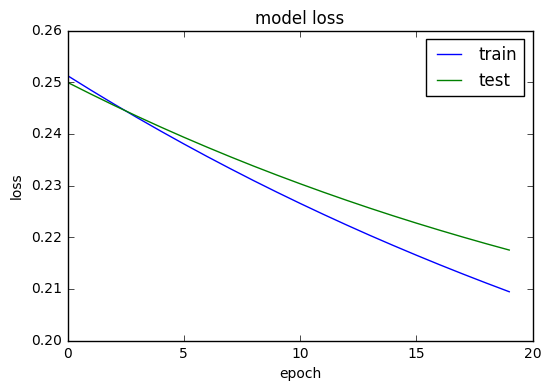

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
out = model.predict(X_test)

In [23]:
stepfn(out-0.5)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [24]:
stepfn(out-0.5) - np.reshape(y_test,(10,1))

array([[-1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.]])

In [25]:
xx,yy = np.meshgrid(np.linspace(-1.2,1.2,100),np.linspace(-1.2,1.2,100))
Xgrid = np.c_[xx.ravel(),yy.ravel()]
out = model.predict(Xgrid)
out = out.reshape(xx.shape)

In [26]:
plt.contourf(xx,yy,stepfn(out-0.5))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.colorbar()
plt.show()

In [28]:
model = Sequential()
model.add(Dense(output_dim=20,init='normal',activation='relu',bias=True,input_dim=2))
model.add(Dense(output_dim=20,init='normal',activation="relu",bias=True))
model.add(Dense(output_dim=20,init='normal',activation="relu",bias=True))
model.add(Dense(output_dim=1,init='normal',activation="sigmoid",bias=True))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
X_train, y_train = X[:,1:], Y
X_test, y_test = Xtest[:,1:], Ytest
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3000, batch_size=20, verbose=0)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 20.00%


In [29]:
xx,yy = np.meshgrid(np.linspace(-1.2,1.2,100),np.linspace(-1.2,1.2,100))
Xgrid = np.c_[xx.ravel(),yy.ravel()]
out = model.predict(Xgrid)
out = out.reshape(xx.shape)
plt.contourf(xx,yy,stepfn(out-0.5))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.show()

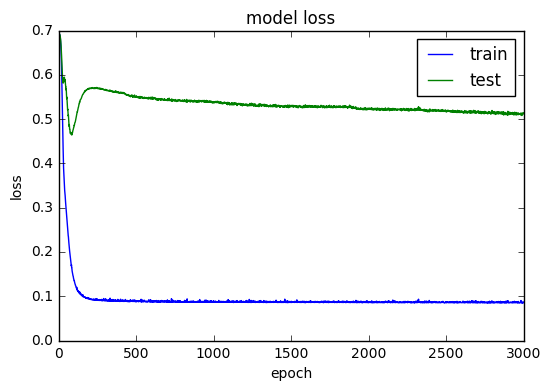

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()